<a href="https://colab.research.google.com/github/leonardoub/SCRIPT_PALERMO/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

#Load data

In [4]:
#load data from Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
train_dataset_path = '/gdrive/My Drive/AIM_PA/database_training2.csv'
test_dataset_path = '/gdrive/My Drive/AIM_PA/database_nostro_without_nan.csv'

In [0]:
df_train = pd.read_csv(train_dataset_path)
df_test = pd.read_csv(test_dataset_path)

In [0]:
df_train.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_test.rename(columns={'Survival.time (months)':'Surv_time_months'}, inplace=True)

In [0]:
df_train.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)
df_test.rename(columns={'Overall.Stage':'Overall_Stage'}, inplace=True)

In [0]:
train_data = df_train.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
test_data = df_test.drop(['Histology', 'Surv_time_months', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

In [0]:
train_targets = df_train.Surv_time_months

In [0]:
test_targets = df_test.Surv_time_months

#Matrice di dispersione

Creiamo una matrice a dispersione, la quale ci consente
di rappresentare le correlazioni a coppie fra le diverse caratteristiche di
questo dataset.

In [0]:
sns.set(style='whitegrid', context='notebook')
cols = train_data.columns
sns.pairplot(train_data[cols], height=2.5)
plt.show()

#Matrice di correlazione

In [0]:
train_data_with_Surv_time_months = df_train.drop(['Histology', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)
test_data_with_Surv_time_months = df_test.drop(['Histology', 'OS', 'deadstatus.event','Overall_Stage'], axis=1)

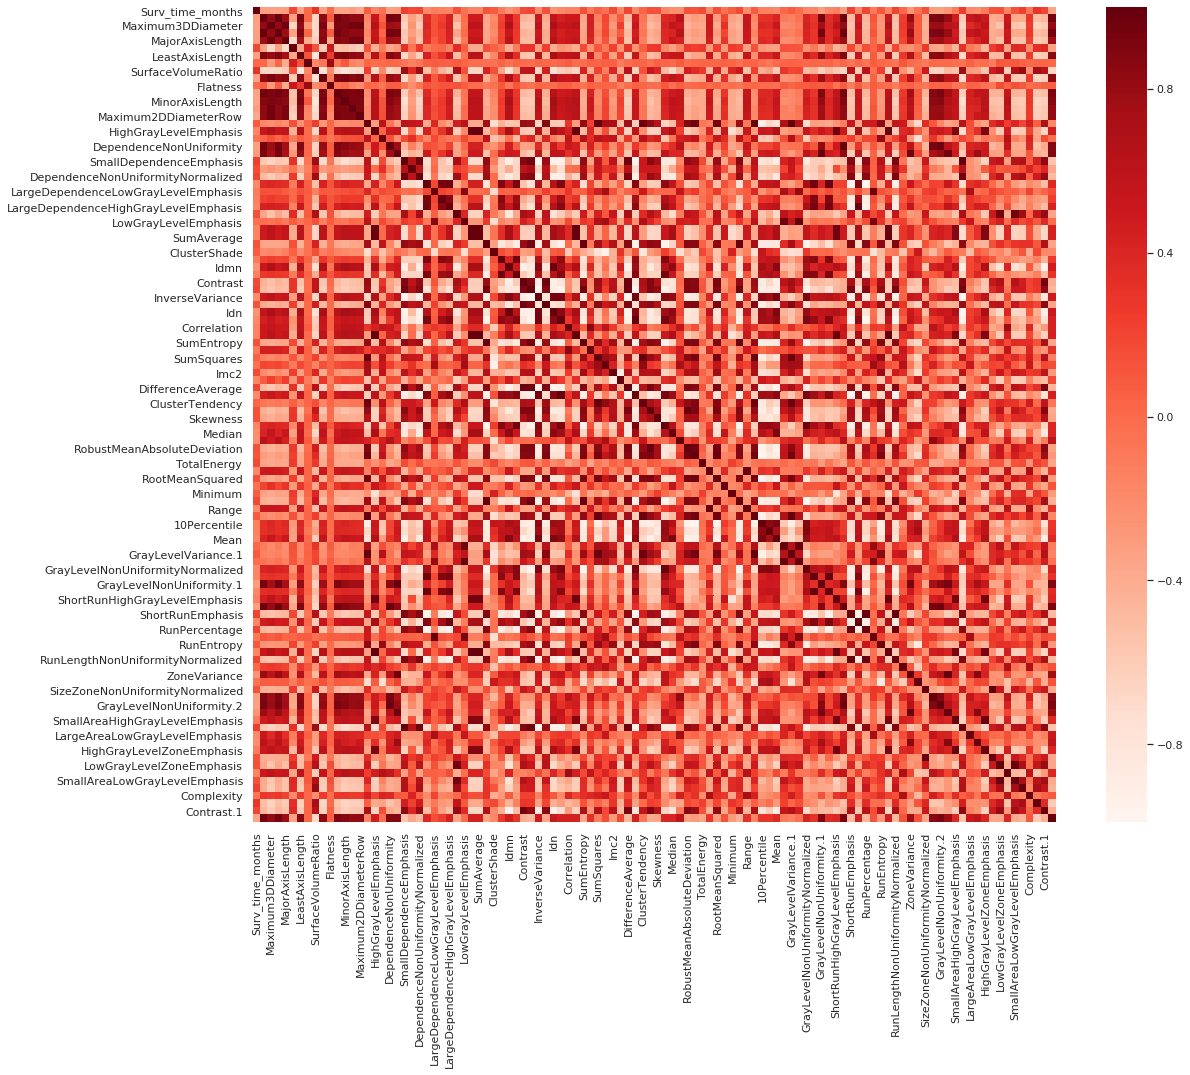

In [23]:
#Using Pearson Correlation
plt.figure(figsize=(18, 15))
cor = train_data_with_Surv_time_months.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

In [24]:
cor

,Surv_time_months,VoxelVolume,Maximum3DDiameter,MeshVolume,MajorAxisLength,Sphericity,LeastAxisLength,Elongation,SurfaceVolumeRatio,Maximum2DDiameterSlice,Flatness,SurfaceArea,MinorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,GrayLevelVariance,HighGrayLevelEmphasis,DependenceEntropy,DependenceNonUniformity,GrayLevelNonUniformity,SmallDependenceEmphasis,SmallDependenceHighGrayLevelEmphasis,DependenceNonUniformityNormalized,LargeDependenceEmphasis,LargeDependenceLowGrayLevelEmphasis,DependenceVariance,LargeDependenceHighGrayLevelEmphasis,SmallDependenceLowGrayLevelEmphasis,LowGrayLevelEmphasis,JointAverage,SumAverage,JointEntropy,ClusterShade,MaximumProbability,Idmn,JointEnergy,Contrast,DifferenceEntropy,InverseVariance,DifferenceVariance,...,10Percentile,Kurtosis,Mean,ShortRunLowGrayLevelEmphasis,GrayLevelVariance.1,LowGrayLevelRunEmphasis,GrayLevelNonUniformityNormalized,RunVariance,GrayLevelNonUniformity.1,LongRunEmphasis,ShortRunHighGrayLevelEmphasis,RunLengthNonUniformity,ShortRunEmphasis,LongRunHighGrayLevelEmphasis,RunPercentage,LongRunLowGrayLevelEmphasis,RunEntropy,HighGrayLevelRunEmphasis,RunLengthNonUniformityNormalized,GrayLevelVariance.2,ZoneVariance,GrayLevelNonUniformityNormalized.1,SizeZoneNonUniformityNormalized,SizeZoneNonUniformity,GrayLevelNonUniformity.2,LargeAreaEmphasis,SmallAreaHighGrayLevelEmphasis,ZonePercentage,LargeAreaLowGrayLevelEmphasis,LargeAreaHighGrayLevelEmphasis,HighGrayLevelZoneEmphasis,SmallAreaEmphasis,LowGrayLevelZoneEmphasis,ZoneEntropy,SmallAreaLowGrayLevelEmphasis,Coarseness,Complexity,Strength,Contrast.1,Busyness
Surv_time_months,1.000000,-0.318936,-0.334456,-0.318857,-0.319466,0.190327,-0.332525,0.005105,0.308066,-0.331666,-0.002128,-0.346001,-0.346330,-0.311450,-0.371979,0.083421,-0.160541,-0.044520,-0.318601,-0.301370,0.242758,0.176155,0.212086,-0.182908,-0.109064,-0.121039,-0.165635,0.142142,-0.035932,-0.150004,-0.150004,0.132654,0.078411,-0.107315,-0.238044,-0.140528,0.173701,0.201963,-0.197362,0.138151,...,-0.139275,-0.141581,-0.179059,0.015111,0.080174,-0.013388,-0.166599,-0.165808,-0.300326,-0.179774,-0.133786,-0.317132,0.207541,-0.176028,0.202787,-0.085902,0.101709,-0.159741,0.209097,0.005735,-0.263767,-0.050776,0.143465,-0.319172,-0.327871,-0.263775,-0.097382,0.246940,-0.184328,-0.209479,-0.108228,0.139274,0.148019,-0.165691,0.144478,0.236936,-0.071161,0.305331,0.202746,-0.354545
VoxelVolume,-0.318936,1.000000,0.821982,0.999999,0.785606,-0.329751,0.898913,0.020392,-0.679146,0.832976,0.072277,0.950756,0.889105,0.838170,0.837324,-0.176830,0.528070,0.033228,0.939428,0.923283,-0.572156,-0.317799,-0.486348,0.369668,0.144763,0.216950,0.432934,-0.362273,-0.015689,0.493080,0.493080,-0.356995,-0.200703,0.205100,0.524585,0.270697,-0.436992,-0.487864,0.510222,-0.388195,...,0.323978,0.328833,0.413992,-0.111564,-0.142230,-0.052167,0.418276,0.298776,0.938199,0.350780,0.469435,0.973643,-0.490008,0.469550,-0.458102,0.118459,-0.254205,0.530056,-0.501210,0.248150,0.799097,0.075534,-0.411886,0.899479,0.922172,0.799043,0.475936,-0.572976,0.523293,0.611567,0.497011,-0.412217,-0.368620,0.506717,-0.381946,-0.401634,0.277302,-0.510155,-0.458069,0.937894
Maximum3DDiameter,-0.334456,0.821982,1.000000,0.821800,0.964760,-0.678628,0.812696,-0.271438,-0.683336,0.917765,-0.271877,0.911623,0.901223,0.940584,0.958797,-0.220656,0.639461,0.133962,0.786661,0.741102,-0.654213,-0.251020,-0.605156,0.395214,0.129414,0.263112,0.460671,-0.531704,-0.054131,0.608983,0.608983,-0.375524,-0.180379,0.249756,0.670078,0.298131,-0.525327,-0.549153,0.599396,-0.433522,...,0.398349,0.371992,0.526980,-0.183269,-0.180156,-0.108437,0.445523,0.317060,0.755681,0.371774,0.594074,0.812268,-0.527681,0.517503,-0.498173,0.073990,-0.270332,0.641334,-0.547216,0.265182,0.621154,0.068929,-0.434710,0.782626,0.794181,0.621175,0.575123,-0.657133,0.372469,0.461945,0.595651,-0.428361,-0.533330,0.573314,-0.555928,-0.586992,0.257297,-0.642559,-0.592542,0.810919
MeshVolume,-0.318857,0.999999,0.821800,1.000000,0.785457,-0.329524,0.898705,0.

#Z-score dei dati

In [0]:
mean = train_data.mean(axis=0)
train_data_stand = train_data - mean
std = train_data.std(axis=0)
train_data_stand /= std

In [0]:
test_data_stand = test_data - mean
test_data_stand /= std

#Train Test Split

Per ora facciamo train test split, ma vista la scarsità di dato sarebbe meglio una cross validation

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
 X_train, X_val, y_train, y_val = train_test_split(train_data_stand, train_targets, test_size=0.3, random_state=0)

#Modello a regressione multipla

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_val_pred = slr.predict(X_val)

#Grafico dei residui

Utilizzando il codice seguente, tracciamo un grafico dei residui, dove
semplicemente sottraiamo le vere variabili target dai responsi previsti.

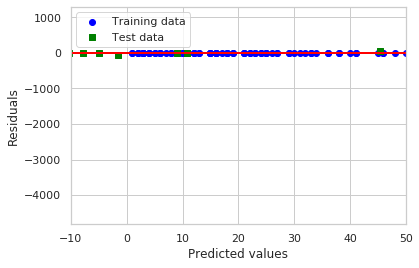

In [43]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_val_pred, y_val_pred - y_val, c='green', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()


In [40]:
max(y_train_pred - y_train)

4.261480057721201e-12

In [41]:
max(y_val_pred - y_val)

1016.2767647056171

##Valutazione con MSE

Un’altra misura quantitativa utile delle prestazioni del modello è il
cosiddetto MSE (Mean Squared Error).

In [44]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_val, y_val_pred)))


MSE train: 0.000, test: 565838.301


##Valutazione con R^2

Talvolta può essere più utile rilevare il coefficiente di determinazione
(R^2), che può essere considerato una versione standardizzata dell’errore MSE

Per il dataset di addestramento, R^2
 è compreso fra 0 e 1, ma può
diventare negativo per il set di test. Se
 , il modello individua
perfettamente i dati e il corrispondente MSE è uguale a 0.


In [47]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_val, y_val_pred)))

R^2 train: 1.000, test: -2068.711
